In [194]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #разделение на тестовые данные
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA функционал
from sklearn.metrics import accuracy_score #показатель точности
from sklearn.cluster import KMeans

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
sepal_data = data[data.columns[:2]]
variety = iris.target

x_train, x_test, y_train, y_test = train_test_split(sepal_data, variety, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train) #обучение
predict = lda.predict(x_test) #прогноз
result = pd.DataFrame([y_test, predict]).T #датасет тестовых и прогнозируемых данных
accuracy_score(y_test, predict) #расчёт точности

0.8157894736842105

In [195]:
lda.coef_ #3 класса, 2 метрики

array([[-5.85622844,  8.19836485],
       [ 1.9206158 , -4.19422955],
       [ 4.21807613, -4.22751177]])

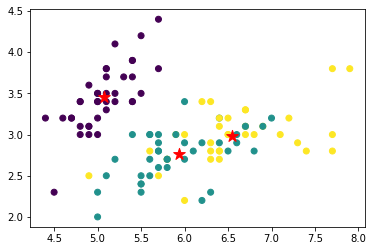

In [206]:
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r',s=150, marker='*')
plt.show()

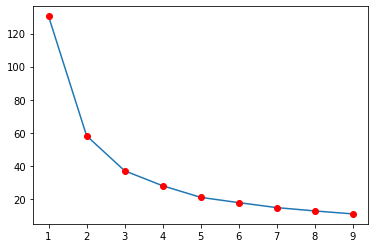

In [317]:
kmeans = KMeans(n_clusters=5)
sepal_array = list(zip(sepal_data['sepal length (cm)'], sepal_data['sepal width (cm)']))
clusters = kmeans.fit_predict(sepal_array)

k_inertia = []
ks = range(1, 10)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(sepal_array)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

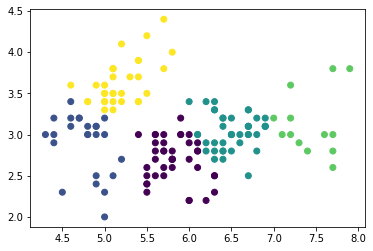

In [318]:
x = []
y = []
for element in sepal_array:
    x.append(element[0])
    y.append(element[1])

plt.scatter(x, y, c=clusters)  